# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query = "&q="
key = "&appid="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + query + city + key + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = (city_weather['main']['temp_max']) - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | miyaly
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | rawson
Processing Record 4 of Set 1 | bredy
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | los altos
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | aioun
Processing Record 13 of Set 1 | st. john's
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | kapuskasing
Processing Record 16 of Set 1 | tulln
Processing Record 17 of Set 1 | passagem franca
Processing Record 18 of Set 1 | nema
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | strugi-krasnyye
Processing Recor

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,miyaly,48.8844,53.7836,25.14,48,4,3.21,KZ,1688523881
1,jamestown,42.0970,-79.2353,21.80,86,0,3.60,US,1688523652
2,rawson,-43.3002,-65.1023,9.57,40,0,10.21,AR,1688523882
3,bredy,52.4153,60.3411,19.26,81,4,4.79,RU,1688523882
4,port-aux-francais,-49.3500,70.2167,4.52,76,100,12.74,TF,1688523882


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/galbeeir/Desktop/git/World_Analysis/World_Weather_Analysis/Starter_Code/starter_code/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("/Users/galbeeir/Desktop/git/World_Analysis/World_Weather_Analysis/Starter_Code/starter_code/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,miyaly,48.8844,53.7836,25.14,48,4,3.21,KZ,1688523881
1,jamestown,42.0970,-79.2353,21.80,86,0,3.60,US,1688523652
2,rawson,-43.3002,-65.1023,9.57,40,0,10.21,AR,1688523882
3,bredy,52.4153,60.3411,19.26,81,4,4.79,RU,1688523882
4,port-aux-francais,-49.3500,70.2167,4.52,76,100,12.74,TF,1688523882


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

Correlation: PearsonRResult(statistic=0.05130068877544104, pvalue=0.21974515157213131)


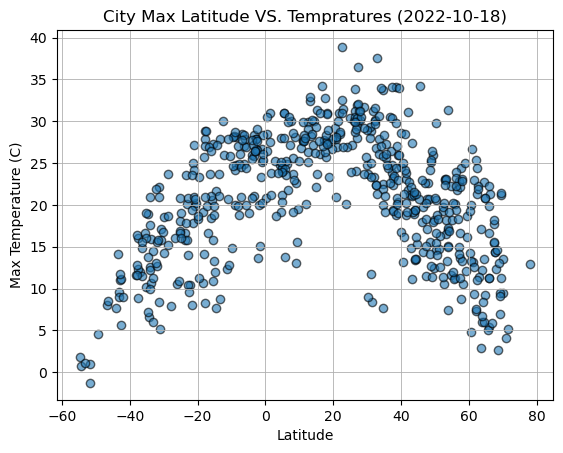

In [11]:
# Build scatter plot for latitude vs. temperature
print(f"Correlation: {st.pearsonr(city_data_df['Lat'], city_data_df['Max Temp'])}")
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.6, edgecolors='black')
plt.title("City Max Latitude VS. Tempratures (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linewidth=0.6)

# Save the figure
plt.savefig("/Users/galbeeir/Desktop/git/World_Analysis/World_Weather_Analysis/Starter_Code/starter_code/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

Correlation: PearsonRResult(statistic=-0.04198536750766529, pvalue=0.31530729208766844)


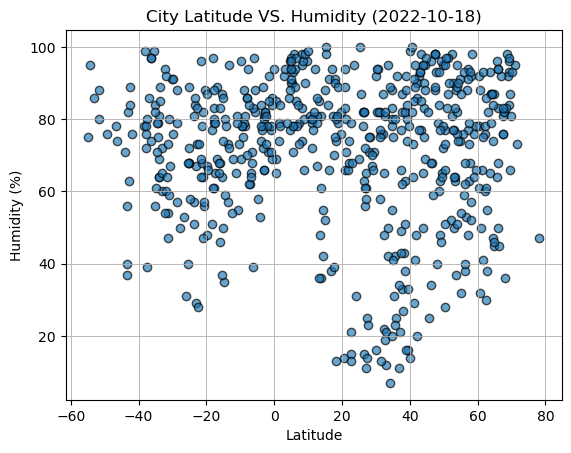

In [12]:
# Build the scatter plots for latitude vs. humidity
print(f"Correlation: {st.pearsonr(city_data_df['Lat'], city_data_df['Humidity'])}")
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=0.67, edgecolors='black')
plt.title("City Latitude VS. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linewidth=0.6)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("/Users/galbeeir/Desktop/git/World_Analysis/World_Weather_Analysis/Starter_Code/starter_code/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

Correlation: PearsonRResult(statistic=0.03831785423491928, pvalue=0.35947501804044063)


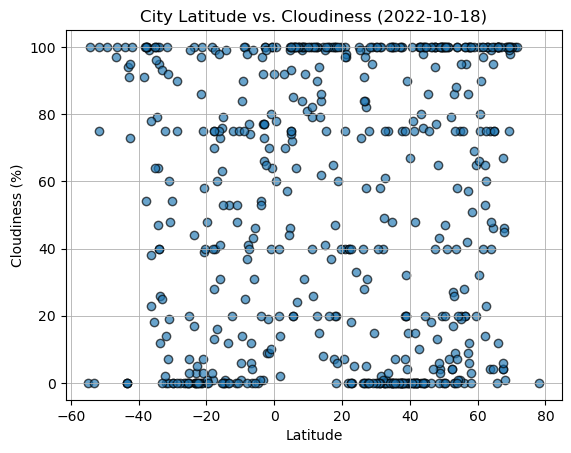

In [13]:
# Build the scatter plots for latitude vs. cloudiness
print(f"Correlation: {st.pearsonr(city_data_df['Lat'], city_data_df['Cloudiness'])}")
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=0.67, edgecolors='black')
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linewidth=0.6)


# Save the figure
plt.savefig("/Users/galbeeir/Desktop/git/World_Analysis/World_Weather_Analysis/Starter_Code/starter_code/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

Correlation: PearsonRResult(statistic=-0.02461168342250477, pvalue=0.5562250604162653)


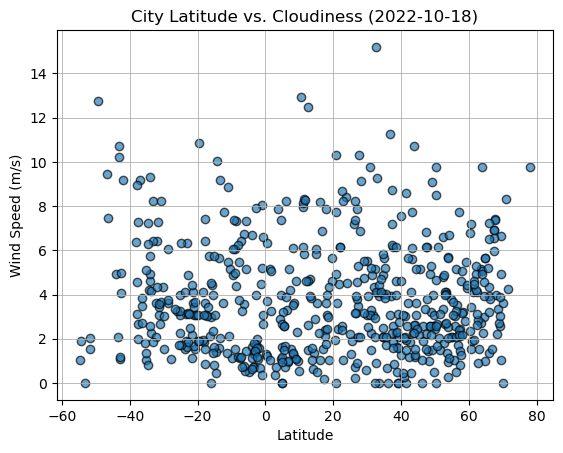

In [14]:
# Build the scatter plots for latitude vs. wind speed
print(f"Correlation: {st.pearsonr(city_data_df['Lat'], city_data_df['Wind Speed'])}")
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.67, edgecolors='black')
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linewidth=0.6)

# Save the figure
plt.savefig("/Users/galbeeir/Desktop/git/World_Analysis/World_Weather_Analysis/Starter_Code/starter_code/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linReg(df, x_column, y_column):
    x = df[x_column].to_numpy()
    y = df[y_column].to_numpy()

    slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
    predicted = slope * x + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(df[x_column], df[y_column], alpha=0.67, edgecolors='black')
    plt.plot(x, predicted, color='r', label='least squares')
    plt.grid(linewidth=0.6)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.annotate(line_eq, (x[3], y[3]), fontsize=15, color="deeppink")
    plt.legend(loc='best', fancybox=True)
    plt.show()

    r_square = print(f"The r-squared is: {r_value**2}")
    pearsonr= print(f"Correlation: {st.pearsonr(df[x_column], df[y_column])}")

    return r_square, predicted, r_square, pearsonr, p_value, std_err 
    

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,miyaly,48.8844,53.7836,25.14,48,4,3.21,KZ,1688523881
1,jamestown,42.0970,-79.2353,21.80,86,0,3.60,US,1688523652
3,bredy,52.4153,60.3411,19.26,81,4,4.79,RU,1688523882
5,albany,42.6001,-73.9662,21.23,92,10,1.85,US,1688523641
9,los altos,37.3852,-122.1141,24.78,66,0,7.20,US,1688523883


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rawson,-43.3002,-65.1023,9.57,40,0,10.21,AR,1688523882
4,port-aux-francais,-49.3500,70.2167,4.52,76,100,12.74,TF,1688523882
6,ushuaia,-54.8000,-68.3000,1.81,75,0,1.03,AR,1688523590
7,avarua,-21.2078,-159.7750,25.03,78,100,3.60,CK,1688523634
8,margaret river,-33.9500,115.0667,12.58,64,95,9.30,AU,1688523883


###  Temperature vs. Latitude Linear Regression Plot

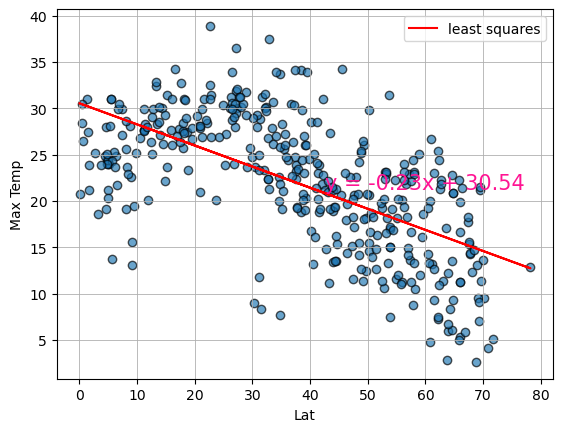

The r-squared is: 0.3904191240406867
Correlation: PearsonRResult(statistic=-0.6248352775257544, pvalue=5.6766875570348684e-43)


In [25]:
# Linear regression on Northern Hemisphere
r_square, predicted, r_square, pearsonr, p_value, std_err = linReg(northern_hemi_df,'Lat', 'Max Temp')

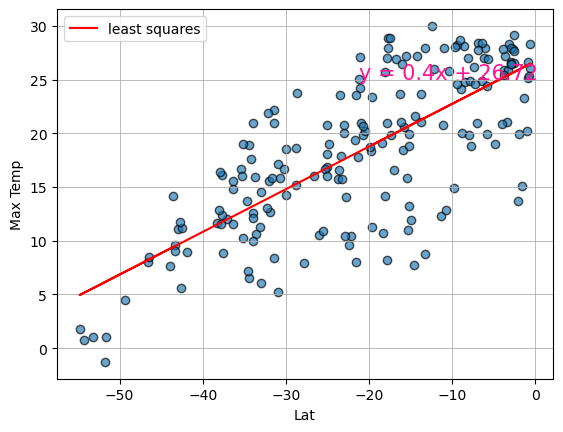

The r-squared is: 0.5590588440844988
Correlation: PearsonRResult(statistic=0.7477023766743682, pvalue=2.8876859340481656e-35)


In [26]:
# Linear regression on Southern Hemisphere
r_square, predicted, r_square, pearsonr, p_value, std_err = linReg(southern_hemi_df,'Lat', 'Max Temp')

### Discussion about the linear relationship:
* **The Northern Hemisphere:** The linear relationship and the correlation coefficient between Latitude and Max Temperature in the Northern Hemisphere suggest a **strong negative relationship**. This makes sense; **the temperature decreases** as we move towards the North Hemisphere and the north pole. 

* **The Southern Hemisphere:** The linear relationship and the correlation coefficient between Latitude and Max Temperature in the Southern Hemisphere suggest a **strong positive relationship**. This makes sense; **the temperature increases** as we move away from the south pole toward the prime meredian of the earth.  

### Humidity vs. Latitude Linear Regression Plot

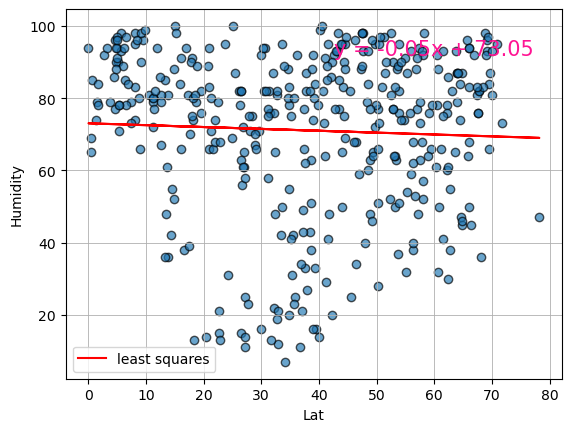

The r-squared is: 0.001987981519169641
Correlation: PearsonRResult(statistic=-0.04458678637410016, pvalue=0.3835881982201263)


In [27]:
# Northern Hemisphere
r_square, predicted, r_square, pearsonr, p_value, std_err = linReg(northern_hemi_df, 'Lat', 'Humidity')

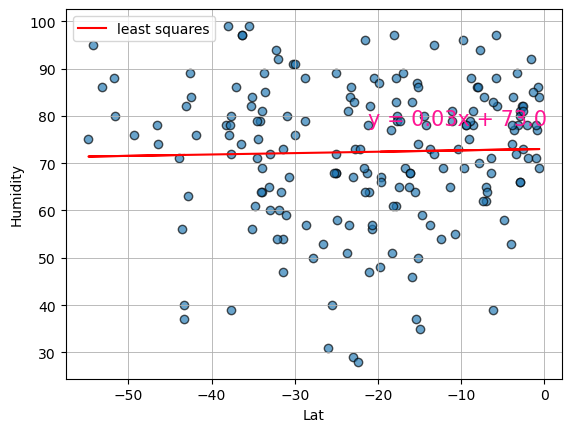

The r-squared is: 0.0007117657143325912
Correlation: PearsonRResult(statistic=0.0266789376537484, pvalue=0.7148261954695925)


In [28]:
# Southern Hemisphere
r_square, predicted, r_square, pearsonr, p_value, std_err = linReg(southern_hemi_df, 'Lat', 'Humidity')

### Discussion about the linear relationship:
* **The Northern &  Southern Hemispheres:** The low r-squared value of 0.001987981519169641 and 0.001987981519169641 for the North and South Hemispheres suggests that Latitude explains only a small portion of the variation in Humidity. This indicates that Latitude alone is not a strong predictor of Humidity. Similarly, the correlation coefficient of -0.04458678637410016 and 0.0266789376537484 of the north and south hemispheres, which is close to 0, indicates a weak and almost negligible linear relationship between Latitude and Humidity.**From these results, it can be concluded that Latitude alone has minimal influence on Humidity.**

### Cloudiness vs. Latitude Linear Regression Plot

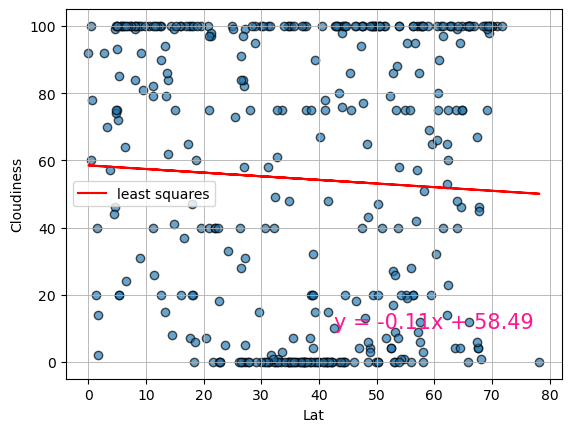

The r-squared is: 0.0026492315380715658
Correlation: PearsonRResult(statistic=-0.051470686201677586, pvalue=0.3144184083866785)


In [29]:
# Northern Hemisphere
r_square, predicted, r_square, pearsonr, p_value, std_err = linReg(northern_hemi_df, 'Lat', 'Cloudiness')

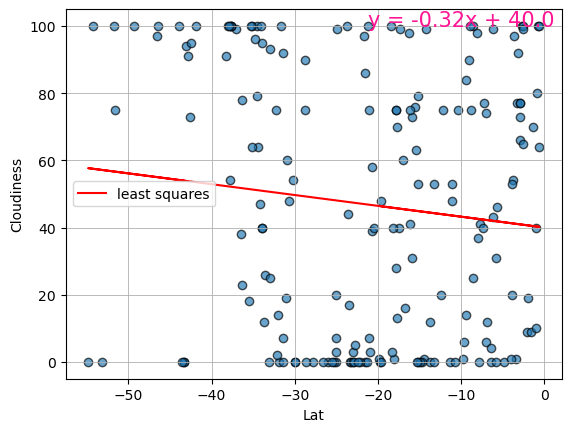

The r-squared is: 0.012520193707532417
Correlation: PearsonRResult(statistic=-0.11189367143646865, pvalue=0.12429315286035739)


In [30]:
# Southern Hemisphere
r_square, predicted, r_square, pearsonr, p_value, std_err = linReg(southern_hemi_df, 'Lat', 'Cloudiness')

### Discussion about the linear relationship:
* **The Northern &  Southern Hemispheres:** The r-squared value of 0.0026492315380715658 and 0.012520193707532417 of the north and south hemispheres indicates that Latitude explains only a small fraction of the variation in Cloudiness. This suggests that Latitude alone is not a strong predictor of Cloudiness. Similarly, the correlation coefficient of -0.051470686201677586 and -0.11189367143646865 of the north and south hemispheres, which is close to 0, indicates a weak and almost negligible linear relationship between Latitude and Cloudiness. **Based on these findings, it can be inferred that Latitude has minimal influence on Cloudiness.**

### Wind Speed vs. Latitude Linear Regression Plot

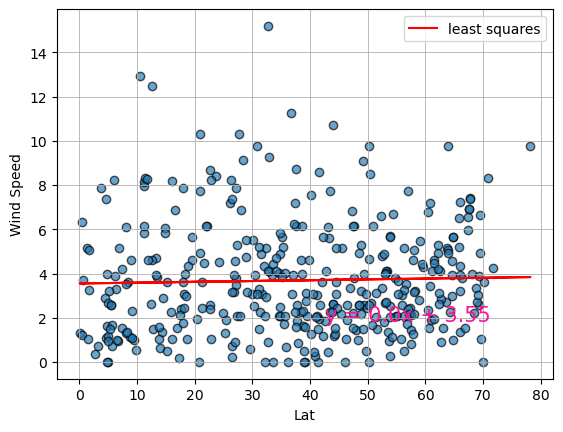

The r-squared is: 0.0008293753684501447
Correlation: PearsonRResult(statistic=0.02879887790262228, pvalue=0.5736954728511657)


In [31]:
# Northern Hemisphere
r_square, predicted, r_square, pearsonr, p_value, std_err = linReg(northern_hemi_df, 'Lat', 'Wind Speed')

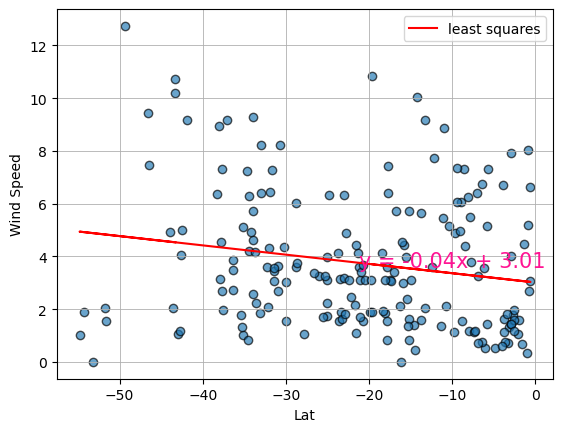

The r-squared is: 0.03453014357821518
Correlation: PearsonRResult(statistic=-0.1858228822783006, pvalue=0.010261658359267328)


In [32]:
# Southern Hemisphere
r_square, predicted, r_square, pearsonr, p_value, std_err = linReg(southern_hemi_df, 'Lat', 'Wind Speed')

### Discussion about the linear relationship:
* **The Northern Hemisphere:** The linear relationship *(r_square  = 0.0008293753684501447)* as well as the correlation *(pearsonsr = statistic=0.02879887790262228, pvalue=0.5736954728511657)* between Latitude and Wind Speed in the Northern Hemisphere barely exists.**From this analysis, it can be inferred that Wind Speed does not show a significant dependence on Latitude in the northern hemisphere, meaning, Wind Speed can vary equally across different cities with different latitude coordinates.**

* **The Southern Hemisphere:** The linear relationship *(r_square =  0.03453014357821518)* as well as the correlation *(statistic=-0.1858228822783006, pvalue=0.010261658359267328)* between Latitude and Wind Speed in the South Hemisphere barely exists. The r-squared value of 0.03453014357821518 indicates that the linear regression model explains only a small proportion of the variability in Wind Speed based on Latitude in the southern hemisphere. This suggests that Latitude has limited predictive power in explaining the variation in Wind Speed. The correlation coefficient indicates on negative correlation between Latitude and Wind Speed in the southern hemisphere (statistic=-0.1858228822783006). **In summary, the analysis suggests Latitude has a weak and limited relationship with Wind Speed in the southern hemisphere.**